In [1]:
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import string 
string.punctuation
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
import re
from nltk.tokenize import word_tokenize
from sklearn.metrics import classification_report, accuracy_score

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rakib\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = pd.read_csv("E:\\Local Disk G\\11th Semester\\CSE475\\Twitter Diseaster Dataset\\train.csv")

In [3]:
len(df)

7613

In [4]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
df.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [6]:
df = df[['text','target']]
df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [18]:
train_df['text_length']= df['text'].apply(lambda x : len(x))

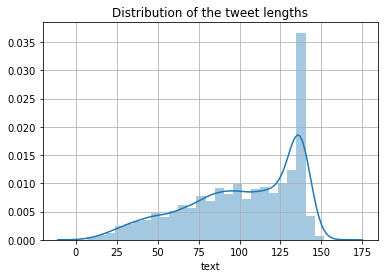

In [19]:
ax=sn.distplot(train_df['text_length']).set_title('Distribution of the tweet lengths');
plt.grid(True)

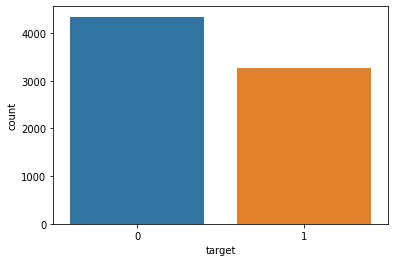

In [8]:
sn.countplot("target",data=df); 
plt.savefig('E:/Local Disk G/11th Semester/CSE475/Twitter Diseaster Dataset/countplot.pdf',bbox_inches='tight')

In [12]:
df['text'][2],df['text'][500],df['text'][100]

("All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected",
 'Christian Attacked by Muslims at the Temple Mount after Waving Israeli Flag via Pamela Geller - ... http://t.co/LHBZHWq4B9',
 '.@NorwayMFA #Bahrain police had previously died in a road accident they were not killed by explosion https://t.co/gFJfgTodad')

In [13]:
EMOJIS = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}
URLPATTERN        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)"
USERPATTERN       = '@[^\s]+'
SEQPATTERN   = r"(.)\1\1+"
SEQREPLACE = r"\1\1"
type(EMOJIS)

dict

In [14]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordLemm = WordNetLemmatizer()

In [15]:
def tweets_cleaning(text):
    lowercase = text.lower()
    punc_removal = [char for char in lowercase if char not in string.punctuation]
    punc_removal_joined = ''.join(punc_removal)
    url_removal = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', punc_removal_joined, flags=re.MULTILINE)
    for emoji in EMOJIS.keys():
        url_removal = url_removal.replace(emoji, "EMOJI" + EMOJIS[emoji])  
   # emoji_removal = url_removal.encode('ascii', 'ignore').decode('ascii')
    emoji_removal=url_removal
    stopwords_removal = [word for word in emoji_removal.split() if word not in stopwords.words('english')]
    return stopwords_removal

In [16]:
df['cleaned_text']=df['text'].apply(tweets_cleaning).astype(str)



In [17]:
df['cleaned_text'][44]

"['wanted', 'set', 'chicago', 'ablaze', 'preaching', 'hotel', 'httptcoo9qknbfofx']"

In [18]:
df_train_clean=df[['cleaned_text','target']]
df_train_clean['cleaned_text']

0       ['deeds', 'reason', 'earthquake', 'may', 'alla...
1       ['forest', 'fire', 'near', 'la', 'ronge', 'sas...
2       ['residents', 'asked', 'shelter', 'place', 'no...
3       ['13000', 'people', 'receive', 'wildfires', 'e...
4       ['got', 'sent', 'photo', 'ruby', 'alaska', 'sm...
5       ['rockyfire', 'update', 'california', 'hwy', '...
6       ['flood', 'disaster', 'heavy', 'rain', 'causes...
7           ['im', 'top', 'hill', 'see', 'fire', 'woods']
8       ['theres', 'emergency', 'evacuation', 'happeni...
9           ['im', 'afraid', 'tornado', 'coming', 'area']
10      ['three', 'people', 'died', 'heat', 'wave', 'f...
11      ['haha', 'south', 'tampa', 'getting', 'flooded...
12      ['raining', 'flooding', 'florida', 'tampabay',...
13        ['flood', 'bago', 'myanmar', 'arrived', 'bago']
14      ['damage', 'school', 'bus', '80', 'multi', 'ca...
15                                       ['whats', 'man']
16                                     ['love', 'fruits']
17            

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfid = TfidfVectorizer(max_features=2000,ngram_range=(1,1))
X_tfid = tfid.fit_transform(df_train_clean['cleaned_text']).toarray()

In [20]:
X_tfid.shape

(7613, 2000)

In [21]:
Y = df['target']

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_tfid, Y, test_size=0.20, random_state=0)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(6090, 2000) (6090,)
(1523, 2000) (1523,)


In [49]:
type(y_train)

pandas.core.series.Series

C:\Users\rakib\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy using Logistic Regression:  80.0 %
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       886
           1       0.81      0.68      0.74       637

    accuracy                           0.80      1523
   macro avg       0.80      0.78      0.79      1523
weighted avg       0.80      0.80      0.80      1523

[[788  98]
 [207 430]]


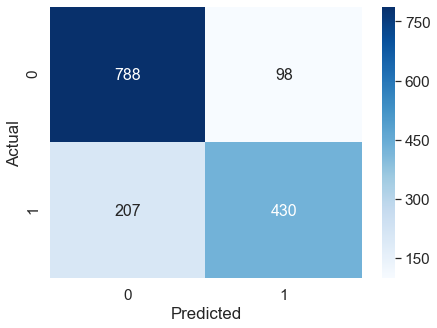

In [55]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(X_train, y_train)

y_pred=lr.predict(X_test)
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using Logistic Regression: ", round(score, 1), "%" )
print(classification_report(y_test, y_pred))
data = metrics.confusion_matrix(y_test, y_pred)
print(data)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (7,5))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size
plt.savefig('E:/Local Disk G/11th Semester/CSE475/Twitter Diseaster Dataset/lr.pdf',bbox_inches='tight')

[0 0 1 ... 1 0 1]
Accuracy using Naive Bayes:  78.1 %
              precision    recall  f1-score   support

           0       0.78      0.88      0.82       886
           1       0.79      0.65      0.71       637

    accuracy                           0.78      1523
   macro avg       0.78      0.76      0.77      1523
weighted avg       0.78      0.78      0.78      1523

[[778 108]
 [225 412]]


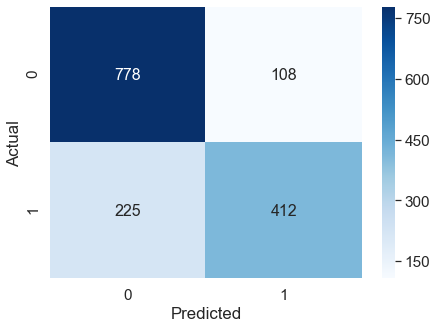

In [52]:
#Naive_Bayes
from sklearn.naive_bayes import MultinomialNB
model_cv = MultinomialNB().fit(X_train, y_train)
y_pred=model_cv.predict(X_test)
print(np.array(y_pred))

score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using Naive Bayes: ", round(score, 1), "%" )
print(classification_report(y_test, y_pred))
data = metrics.confusion_matrix(y_test, y_pred)
print(data)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (7,5))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

In [23]:
from sklearn.ensemble import RandomForestClassifier
modelRF = RandomForestClassifier(random_state=42)
modelRF.fit(X_train, y_train)
y_pred=modelRF.predict(X_test)
score = accuracy_score(y_test, y_pred) * 100
print("Accuracy using Random Forest: ", round(score, 1), "%" )
print(classification_report(y_test, y_pred))

C:\Users\rakib\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy using Random Forest:  77.0 %
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       886
           1       0.76      0.66      0.70       637

    accuracy                           0.77      1523
   macro avg       0.77      0.75      0.76      1523
weighted avg       0.77      0.77      0.77      1523



In [ ]:
test = pd.read_csv("E:\\Local Disk G\\11th Semester\\CSE475\\Twitter Diseaster Dataset\\test.csv",usecols=['text','id'])
test.head()

In [ ]:
import time
t = time.time()
corpus = []
length = len(test)
for i in range(0,length):
    ## lower casing
    text = test["text"][i].lower()
    ### Replacing URL
    text = re.sub(URLPATTERN,' URL',text)
    ### Replacing EMOJI
    for emoji in EMOJIS.keys():
        text = text.replace(emoji, "EMOJI" + EMOJIS[emoji])  
    ### Replacing USER pattern
    text = re.sub(USERPATTERN,' URL',text)
    ### Removing non-alphabets
    text = re.sub('[^a-zA-z]'," ",text)
    ### Removing consecutive letters
    text = re.sub(SEQPATTERN,SEQREPLACE,text)
    text = text.split()
    text = [wordLemm.lemmatize(word) for word in text if not word in stopwords.words('english') and len(word) > 1]
    text = ' '.join(text)
    corpus.append(text)
print(f'Time Taken: {round(time.time()-t)} seconds')

In [ ]:
X_tfid = tfid.fit_transform(corpus).toarray()

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
prediction = lr.predict(X_tfid)
print(prediction)

In [ ]:
test["target"]=prediction

In [ ]:
test.to_csv('E:\\Local Disk G\\11th Semester\\CSE475\\Twitter Diseaster Dataset\\testpredict1.csv', index=False)